In [137]:
import numpy as np # numerical operations
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
import pandas as pd # dataframe manipulation

sns.set(context='paper', style='ticks', font_scale=1)

## 1. English wowels and their formants

We are going to use the data on vowel formants from [here](https://www.phon.ucl.ac.uk/courses/pals0039/datasets.php). It contains data on English vowels produced by 44 speakers (31 female, 14 male) . The data is stored in the file `vowels.csv`.

### 1.1 Data & summary statistics

Let's start by reading the data:

In [131]:
vowels = pd.read_csv('vowels.csv')

Let's see how the data looks like:

In [132]:
vowels.head(10)

,SPEAKER,WORD,VOWEL,F1,F2,SEX,HEIGHT
0,S1,bad,æ,848.070,1450.960,male,173
1,S1,bard,ɑ,648.318,1126.220,male,173
2,S1,bead,i,259.000,1834.000,male,173
3,S1,bed,e,578.985,1715.220,male,173
4,S1,bid,ɪ,405.000,1899.000,male,173
5,S1,bird,ɜ,656.600,1414.400,male,173
6,S1,board,ɔ,360.034,988.693,male,173
7,S1,bod,ɒ,513.689,1023.000,male,173
8,S1,booed,u,277.000,1461.000,male,173
9,S1,bud,ʌ,592.313,1278.600,male,173


Let's count how many unique speakers are in the data:

In [133]:
vowels['SPEAKER'].drop_duplicates().shape

(44,)

Count the number of male and female speakers:

In [134]:
### YOUR CODE HERE ###

Plot it as a bar chart:

In [135]:
### YOUR CODE HERE ###

Plot a distribution of heights (note that each speaker produced multiple vowels).

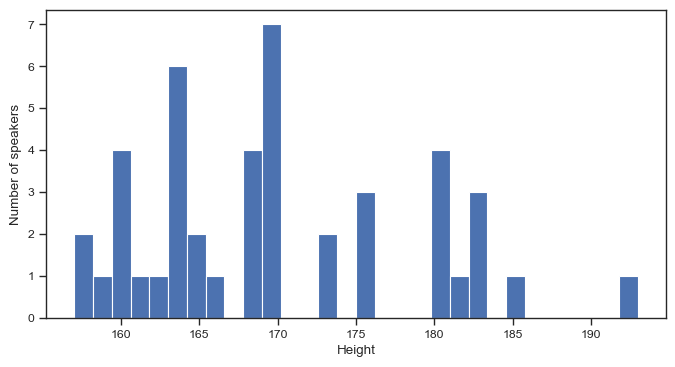

In [136]:
plt.figure(figsize=(8, 4))
plt.hist(vowels.drop_duplicates(subset='SPEAKER')['HEIGHT'], bins=30)
plt.xlabel('Height')
plt.ylabel('Number of speakers')
plt.show()

Can you do the same, but by gender? Hint: use subplots (you can read more about them [here](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html)).

In [112]:
### YOUR CODE HERE ###

### 1.1. Representing the wovel space

Let's plot a scatter plot of the first two formants of the vowels. For now, we can plot all of the vowels in the same plot.

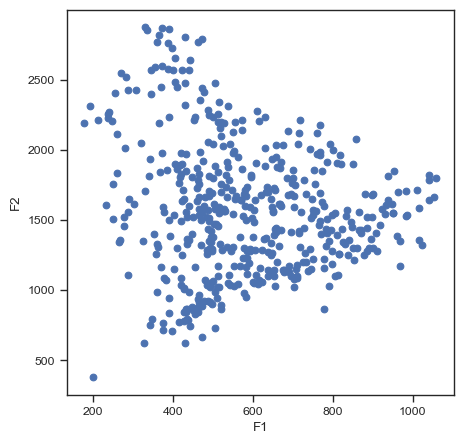

In [61]:
plt.figure(figsize=(5, 5)) # set the size of the plot
plt.scatter(vowels['F1'], vowels['F2']) # create a scatter plot
plt.xlabel('F1') # set the x-axis label
plt.ylabel('F2') # set the y-axis label
plt.show() # show the plot

That's a bit messy. First, we cannot distinguish the different vowels. We can fix that by plotting each vowel with unique color. 

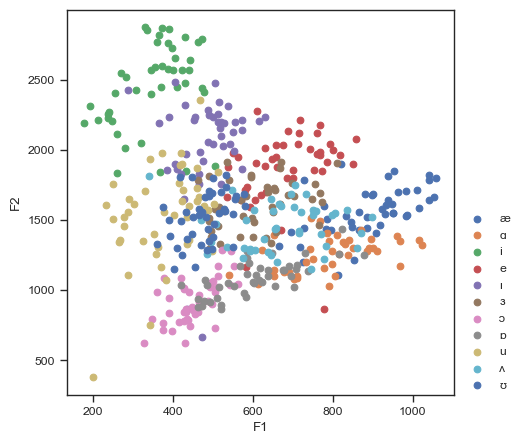

In [72]:
plt.figure(figsize=(5, 5)) # set the size of the plot
for vowel in vowels['VOWEL'].drop_duplicates(): # get unique vowels to serve as labels
    plt.scatter(vowels[vowels['VOWEL'] == vowel]['F1'], 
                vowels[vowels['VOWEL'] == vowel]['F2'], 
                label=vowel)
plt.xlabel('F1') # add labels
plt.ylabel('F2') # add labels
plt.legend(frameon=False, # removing the frame
           bbox_to_anchor=(1, 0.5)) # moving the legend to the outside
plt.show() # show the plot

What's wrong with the plot, compare it with the vowel chart below. What do you think is the problem?

**NB 1: the vowel chart is for the California English dialect, but it should give you an idea of what the vowel space should look like.**

**NB 2:  Ω is probably æ (near-open front unrounded)**

<!-- insert image from link -->

![vowel_chart](https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/California_English_vowel_chart.svg/440px-California_English_vowel_chart.svg.png)

How can we change the chart to make it look more like the vowel chart? Pay attention to the axes and sounds like [i].

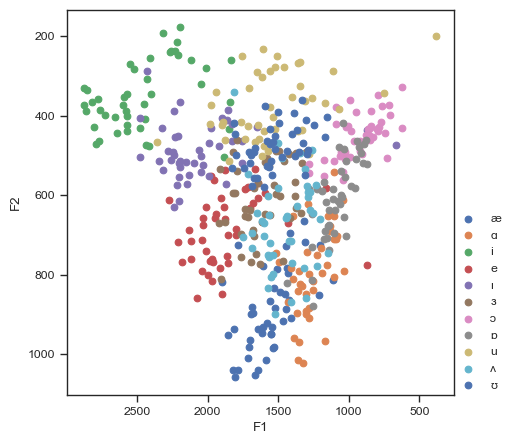

In [82]:
# invert x and y axis
plt.figure(figsize=(5, 5))
for vowel in vowels['VOWEL'].drop_duplicates():
    plt.scatter(vowels[vowels['VOWEL'] == vowel]['F2'], vowels[vowels['VOWEL'] == vowel]['F1'], label=vowel)
plt.xlabel('F1')
plt.ylabel('F2')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.legend(frameon=False, 
           bbox_to_anchor=(1.15, 0.5))
plt.show()

This is a representation of how every individual speaker produces the vowels, but we can also represent the average formants for each vowel (by modifying the previous plot to compute average formants per formant). Let's do that. 

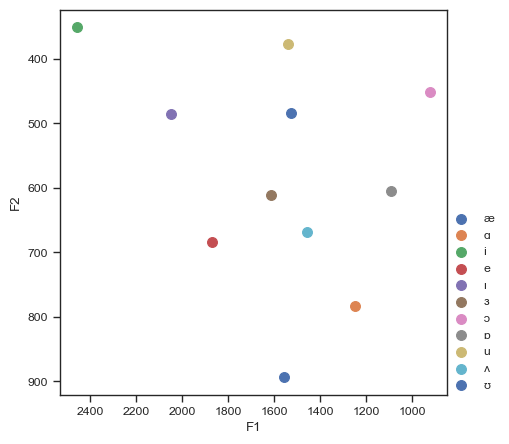

In [83]:
# plot vowels as ipa symbols instead of dots
plt.figure(figsize=(5, 5))
for vowel in vowels['VOWEL'].drop_duplicates():
    plt.scatter(vowels[vowels['VOWEL'] == vowel]['F2'].mean(), 
                vowels[vowels['VOWEL'] == vowel]['F1'].mean(), 
                label=vowel,
                s=50)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('F1')
plt.ylabel('F2')
plt.legend(frameon=False, 
           bbox_to_anchor=(1.15, 0.5))
plt.show()

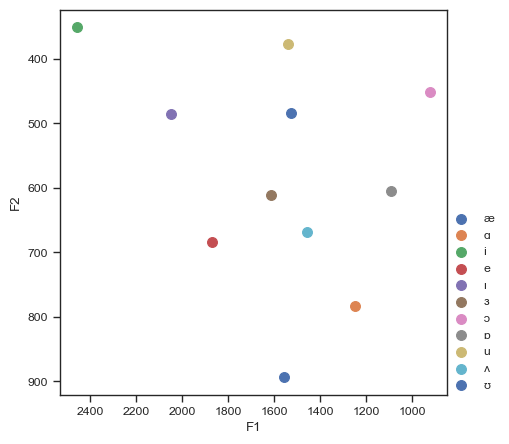

In [85]:
# plot vowels as ipa symbols instead of dots
plt.figure(figsize=(5, 5))
for vowel in vowels['VOWEL'].drop_duplicates():
    plt.scatter(vowels[vowels['VOWEL'] == vowel]['F2'].mean(), 
                vowels[vowels['VOWEL'] == vowel]['F1'].mean(), 
                label=vowel,
                s=50)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('F1')
plt.ylabel('F2')
plt.legend(frameon=False, 
           bbox_to_anchor=(1.15, 0.5))
plt.show()

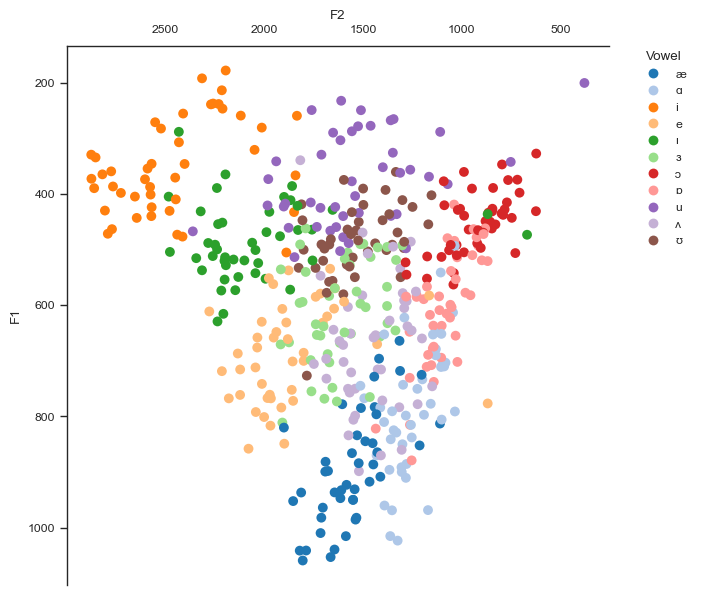

In [16]:
# plot the average formants for each vowel by height
plt.figure(figsize=(7, 7))
sns.scatterplot(data=vowels, 
                x='F2', y='F1', 
                hue='VOWEL', 
                # style='SEX', 
                palette='tab20',
                s=50,
                linewidth=0)
# reverse the y-axis
plt.gca().invert_yaxis()
# reverse the x-axis
plt.gca().invert_xaxis()
# put x axis on top 
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.set_ticks_position('top')
plt.legend(bbox_to_anchor=(1.05, 1), 
           loc=2, 
           borderaxespad=0., 
           title='Vowel', 
           frameon=False)
sns.despine(bottom=True, right=True, top=False, left=False)
# remove bottom and right spines
plt.show()

### 1.3. Predicting the wovel from the formants

In [113]:
from sklearn.preprocessing import StandardScaler # scale the data
from sklearn.model_selection import train_test_split # split the data into training and testing sets
from sklearn.metrics import accuracy_score # calculate accuracy
from sklearn.ensemble import RandomForestClassifier # random forest classifier

First, we need to split the data into the predictors (x) and the target (y). The predictors are the formants, and the target is the vowel label.

In [114]:
x = vowels[['F1', 'F2']]
y = vowels['VOWEL']

Then we need to scale the data, so that the formants on the same scale. We can do it by subtracting the mean and dividing by the standard deviation. That way, for each formant (F1 or F2), their value would correspond the difference in number of standard deviations from the mean. Let's write the formula below as a function.

$\text{standard score}(x) = \frac{x - \mu}{\sigma}$

In [115]:
def scaler(x):
    return (x - x.mean()) / x.std()

Then apply it to each row in the x data.

In [116]:
x_scaled = x.apply(scaler, axis=0)

Let's check the data:

In [118]:
x_scaled.head(10)

,F1,F2
0,1.437650,-0.265693
1,0.361257,-0.955811
2,-1.736640,0.548321
3,-0.012354,0.295897
4,-0.949898,0.686455
5,0.405886,-0.343388
6,-1.192204,-1.248076
7,-0.364211,-1.175168
8,-1.639645,-0.244357
9,0.059466,-0.631982


What should be the mean of the each transformed formant?

In [119]:
### YOUR CODE HERE ###

Ok, now let's split the transformed data into training and testing sets. We can use 80% of the data for training and 20% for testing. We can also set the random state, so that our results are reproducible. You can read more about this here: [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,
                                                    test_size=0.2, 
                                                    random_state=42)

We want to classify vowels, so we have multiple classes. You are probably familiar with binary classification, but we can also classify multiple classes. You can read more about it [here](https://scikit-learn.org/stable/modules/multiclass.html). Today, we will be using the random forest classifier, which is essentially an ensemble of decision trees. You can read more about it [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). We start by initializing the model with the default parameters.

In [120]:
# train a logistic regression model
model = RandomForestClassifier()

We need to fit the model first. Then we can predict the vowels for the test data.

In [122]:
model.fit(x_train, y_train)

RandomForestClassifier()

We can first start by checking the accuracy (i.e. how many times the model predicted the correct vowel). We can do it by comparing the predicted vowels with the true vowels.

In [123]:
y_pred_train = model.predict(x_train)

Let's look at the accuracy of the model on the training data:

In [125]:
accuracy_score(y_train, y_pred_train)

1.0

Let's try to predict the vowels for the test data. Test data is different, because the model hasn't seen it before. What do you think the accuracy will be? 

You will first need to predict the vowels for the test data and then calculate the accuracy.

In [126]:
# predict the test data
y_pred = model.predict(x_test)

In [127]:
# print the accuracy
print(accuracy_score(y_test, y_pred))

0.6804123711340206


### 1.4. Predicting the wovel from the formants and the gender of the speaker

In [98]:
# let's add gender to the model
# convert sex to binary
vowels['SEX_b'] = vowels['SEX'].map({'male': 0, 'female': 1})

In [99]:
# create a new x
x = vowels[['F1', 'F2', 'SEX_b']]
y = vowels['VOWEL']

# scale the data
scaler = StandardScaler()
# do not scale the binary variable
x_scaled = scaler.fit_transform(x[['F1', 'F2']])

# add the binary variable back
x_scaled = np.concatenate([vowels[['SEX_b']], x_scaled], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,
                                                    test_size=0.2, 
                                                    random_state=42)

In [101]:
# fit the model
model = RandomForestClassifier()

model.fit(x_train, y_train)

RandomForestClassifier()

In [102]:
# predict the test data
y_pred = model.predict(x_test)

In [103]:
# print the accuracy
print(accuracy_score(y_test, y_pred))

0.7319587628865979


In [106]:
# print the classification report
print(accuracy_score(y_test, y_pred))

0.7319587628865979


In [107]:
# finally, let's add height to the model
x = vowels[['F1', 'F2', 'SEX_b', 'HEIGHT']]
y = vowels['VOWEL']

# scale the data
scaler = StandardScaler()
# do not scale the binary variable
x_scaled = scaler.fit_transform(x[['F1', 'F2', 'HEIGHT']])
# add the binary variable back
x_scaled = np.concatenate([vowels[['SEX_b']], x_scaled], axis=1)

In [108]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,
                                                    test_size=0.2, 
                                                    random_state=42)

In [109]:
# fit the model
model = RandomForestClassifier()

model.fit(x_train, y_train)

RandomForestClassifier()

In [110]:
# predict the test data
y_pred = model.predict(x_test)

In [111]:
# print the accuracy
print(accuracy_score(y_test, y_pred))

0.7010309278350515
